# Feature Scaling

Feature scaling is a **data preprocessing technique** used to bring all numerical features (variables) into the same range or scale without distorting differences in the values.

Or you can simply say scaling adjusts the **values of features** so that they **have a comparable range or distribution**, especially when features are on **very different scales**. This helps machine learning models treat each feature more fairly during training.

Example:

`Age` ranges from 20–70

`Income` ranges from 20,000–100,000

If we feed them directly into some models, the larger-scale feature (`Income`) will dominate over the smaller-scale one (`Age`).


### Why Do We Use It?

1. Prevents domination of large-scale features

    * Models that rely on **distance** (KNN, K-means, PCA) or **gradient-based optimization** (Logistic/Linear Regression, Neural Networks) are heavily affected by the scale of features.

    * Scaling ensures all features contribute **fairly**.

2. Speeds up convergence

    * For gradient descent–based models, scaled data helps the algorithm converge faster (because the cost function doesn’t zigzag).

3. Improves interpretability

    * In models like regression, the coefficients become easier to compare when features are on the same scale.


### What If We Don’t Use It?

* **KNN / K-means / PCA** → Distances get biased toward large-scale features.

  Example: `Income` could dominate `Age`, even if `Age` is equally important.

* **Gradient Descent–based models** → Training becomes slower, sometimes failing to converge properly.

* **Regression models** → Coefficients become misleading, as features on larger scales appear artificially more important.

* **Tree-based models (Decision Trees, Random Forest, XGBoost)** → They don’t need scaling because they split based on thresholds, not distances.


### Types of Feature Scaling

* **Min-Max Scaling (Normalization)** → Scales values to `[0,1]`
$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

* **Standardization (Z-score Scaling)** → Scales values to mean = 0, std = 1
$$x' = \frac{x - \mu}{\sigma}$$

* **Robust Scaler (IQR Scaling)** I → Uses median and IQR (good for outliers).

    * Uses median and interquartile range, which makes it robust to outliers

    * Formula:
        $$x_{scaled} = \frac{x - median}{IQR}$$ 

    * Use when: Your data has outliers.

| Method          | Formula                                      | Use Case                                                     |
| --------------- | -------------------------------------------- | ------------------------------------------------------------ |
| Min-Max Scaling | $x' = \frac{x - x_{min}}{x_{max} - x_{min}}$ | When you need data in a fixed \[0,1] range                   |
| Standardization | $x' = \frac{x - \mu}{\sigma}$                | When you need mean=0, std=1 (works well with most ML models) |
| Robust Scaler   | $x' = \frac{x - median}{IQR}$                | When you have outliers                                       |

**Min-Max scaling can be sensitive to outliers** — so *Standardization or Robust Scaler is preferred when extreme values exist*.

And if in case you are wondering, if feature scaling makes you loose your data or it changes any pattern of your data then-NO, Feature scaling does NOT make you lose data, nor does it change the underlying pattern. 

### Feature Scaling Actually Does Not:

* Drop any rows or columns

* Remove information

* Change relationships between points

It’s like converting all distances from meters to kilometers — the numbers change, but the relative distances stay exactly the same.

---

### Effects on Outliers while using Different Scaling Technique

1. Standardization (Z-score Scaling)

    * Effect of Outliers:
        * Outliers do affect the mean (μ) and standard deviation (σ), so the entire distribution shifts and stretches.

    * What to Do:

        * If outliers are legitimate data points (e.g., very high but real house prices), you usually keep them — you just need to be aware that scaling will reduce how far they look from the mean.

        * If outliers are errors or noise, remove or cap them (e.g., using winsorization or z-score threshold filtering) before standardization.

2. Robust Scaling

    * Effect of Outliers:
        * Almost no effect — because median and IQR are not influenced by extreme values.

    * What to Do:

        * You don’t need to remove outliers just to make robust scaling work — that’s exactly what robust scaling is designed for.

        * You might still remove outliers if they are true anomalies that would distort your model, but not because of the scaling step.
     
---
     
#### Just to ignore all the effects you can just use a proper ML preprocessing pipeline.

* Removing outliers first makes your scaling more meaningful, because mean/median/min/max are no longer distorted.

* Scaling after outlier removal ensures all features are on a comparable scale, which helps most ML models train faster and perform better.

* Training on the scaled data is completely valid and usually improves convergence (especially for models using gradient descent).


### Why This Works So Well

* **Statistical estimates become stable** → mean, std, min, max, IQR are all representative of your data.

* **Scaling transforms are accurate** → no single extreme value dominates the transformation.

* **Model learns faster** → weights update more evenly across features.

* **No information loss (except bad outliers)** → your model still sees all relevant, legitimate data points.


##### So Your Final Pipeline Looks Like:

1. `Outlier Handling`

    * Detect and remove extreme/unwanted outliers (or cap them if necessary).

2. `Feature Scaling`

    * Apply Min-Max / Standardization / Robust depending on your model and data distribution.

3. `Model Training`

    * Train your algorithm on the cleaned & scaled dataset.
  
---

### When should you use IQR method or Z-Score to remove Outliers from you data:

1. **IQR Method (Interquartile Range)**

* How it works:

    * Finds the 25th percentile (Q1) and 75th percentile (Q3).

    * Computes IQR = Q3 - Q1.

    * Anything below **Q1 - 1.5×IQR** or above **Q3 + 1.5×IQR** is considered an outlier.

* Key Feature: Based on **median & percentiles** → very robust to extreme values.

* When to Use:
    * When your data is **not normally distributed** (skewed, long-tailed, etc.)
    * When you want a **non-parametric** method (no assumption about data distribution)
    * When you care about being robust to outliers themselves

2. Z-Score Method

* How it works:

    * Calculates mean (μ) and standard deviation (σ).

    * Computes Z = (X - μ) / σ.

    * Anything with |Z| > 3 (commonly) is considered an outlier.

* Key Feature: Based on **mean & standard deviation** → sensitive to extreme values.

* When to Use:
    * When your data is **approximately normal** (bell-shaped distribution)
    * When you want to measure **how many standard deviations away** a point is
    * When you prefer a probabilistic interpretation (Z > 3 ≈ rare event in normal distribution)

### Big Difference

* IQR works on ranks (position in sorted data) → robust, no assumption about shape

* Z-Score works on distances from mean → assumes data is roughly symmetric/normal

---

### Rule of Thumb (Quick Decision)


* Looks normal? → Use Z-Score

* Looks skewed? → Use IQR

* Not sure? → IQR is safer, since it doesn’t assume normality.


| Situation                                | Best Choice |
| ---------------------------------------- | ----------- |
| Data is symmetric & bell-shaped          | **Z-score** |
| Data is skewed or unknown distribution   | **IQR**     |
| Small dataset (mean & std unreliable)    | **IQR**     |
| Large dataset & want statistical meaning | **Z-score** |


### Example

Imagine this dataset:

`[10, 12, 13, 15, 14, 11, 100]`

* **Mean = 26.4, Std ≈ 31.3**

    * Z-score for 100 = (100 - 26.4)/31.3 ≈ 2.34 → ❌ Not flagged if cutoff = 3

* **IQR = Q3 - Q1 = 15 - 11.5 = 3.5**

    * Upper bound = 15 + 1.5×3.5 = 20.25 → ✅ 100 is flagged as outlier

So in this skewed dataset, IQR works better.

So let's get started and yes again it's gonna be the same loan_df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
from kagglehub import KaggleDatasetAdapter
import urllib.request

warnings.filterwarnings('ignore')    # This can be used for removing any future warnings
%matplotlib inline

The file`loan.csv` was taken from [here](https://www.kaggle.com/datasets/tanishaj225/loancsv)

In [2]:
# Set the path to the file you'd like to load
file_path = "loan.csv"  # file inside tanishaj225/loancsv dataset

# Load dataset into pandas DataFrame
loan_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "tanishaj225/loancsv",   # dataset slug
    path=file_path           # specify file to load
)

In [3]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let's start again with the removing of the outliers with the help of `IQR` and filling up any **NaN** values using the 
KNNImputer and filling up the categorical or the object type with the help of **mode** and also fill up the invalid or the zero values in the required columns

In [4]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# First let's fill up the categorical once
cat = loan_df.select_dtypes(include='object').columns

In [7]:
cat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loan_df.shape

(614, 13)

In [9]:
for col in cat:
    loan_df[col].fillna(loan_df[col].mode()[0], inplace=True)

In [10]:
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see the categorical data has been filled now it's time for the float type but if you remember correctly we should 
drop any column which has more than 50% of the data missing but if the column is important we should either look a way to fill it up or find another dataset

In [11]:
# Let's find the percentage of missing values in column Credit_History
missing_percentage = loan_df['Credit_History'].isna().mean() * 100
missing_percentage

np.float64(8.143322475570033)

Since the missing value in `Credit_History` is about 8.14% so we can either go with it or just drop it depending whether this feature is important on your model like:

* **Target variable** – What we are predicting (e.g., loan approval, default risk, interest rate).

* **Other features** – Whether we already have features like `PaymentHistory`, `Income`, or `DebtToIncomeRatio` that capture similar information about creditworthiness.

In [12]:
# Let's use KNNImputer to fill up the float64 dtype
from sklearn.impute import KNNImputer

In [13]:
flo = loan_df.select_dtypes(include='float64').columns

In [14]:
knn = KNNImputer(n_neighbors=5)
# Fit-transform and keep column names + index
loan_df[flo] = pd.DataFrame(knn.fit_transform(loan_df[flo]), columns=flo, index=loan_df.index)

In [15]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After filling missing values with KNN imputation, we still have `0` values in columns like `ApplicantIncome` and `CoapplicantIncome`.

Since a true income of `0` is unlikely and often represents missing data, we will replace these `0`s with `NaN` and re-impute them to maintain data consistency.

In [16]:
loan_df.ApplicantIncome.replace(0, np.nan, inplace=True)
loan_df.CoapplicantIncome.replace(0, np.nan, inplace=True)

In [17]:
loan_df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

After Analyzing CoapplicantIncome

We identified about 273 invalid values in the `CoapplicantIncome` column.

Next, let's calculate the percentage of missing values in this column to understand the extent of the issue.

In [18]:
missing_perc = loan_df.CoapplicantIncome.isna().mean() * 100
missing_perc

np.float64(44.462540716612374)

The missing values in `CoapplicantIncome` are just under 50%, which is still acceptable to work with.
Instead of dropping this column and losing valuable information, we will use **KNNImputer** to fill in the missing values based on the patterns in other features.

In [19]:
knn = KNNImputer(n_neighbors=5)
coapp_df = loan_df[['CoapplicantIncome']]

imputed = pd.DataFrame(knn.fit_transform(coapp_df), columns=['CoapplicantIncome'], index=loan_df.index)

In [20]:
# Assign back to original DataFrame
loan_df['CoapplicantIncome'] = imputed['CoapplicantIncome']

In [21]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,2919.193314,216.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2919.193314,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,2919.193314,141.0,360.0,1.0,Urban,Y


In [23]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2919.193314,146.820521,342.254072,0.844300
std,6109.041673,2540.709504,84.423462,64.469530,0.351726
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,2064.750000,100.250000,360.000000,1.000000
50%,3812.500000,2919.193314,128.000000,360.000000,1.000000
75%,5795.000000,2919.193314,169.050000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


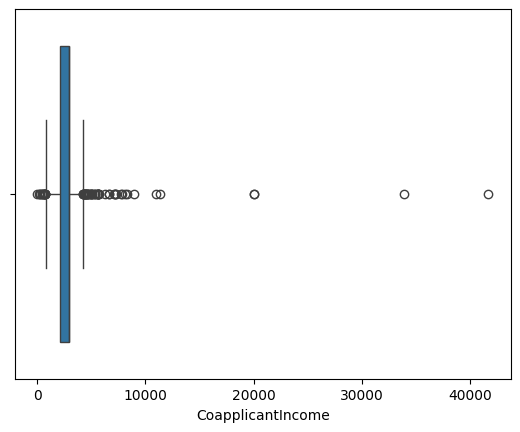

In [24]:
# Now let's look at the Outliers using the boxplot
sns.boxplot(data=loan_df,x='CoapplicantIncome')
plt.show()

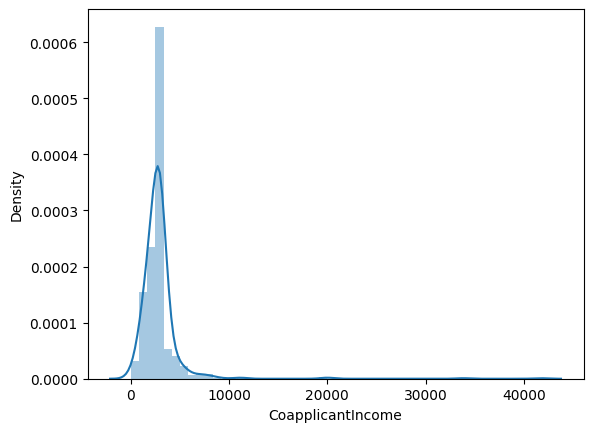

In [25]:
sns.distplot(loan_df.CoapplicantIncome)
plt.show()

In [26]:
# Let's remove the outliers using the IQR method
q1 = loan_df.CoapplicantIncome.quantile(0.25)
q3 = loan_df.CoapplicantIncome.quantile(0.75)

In [27]:
IQR = q3 - q1

In [28]:
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

In [29]:
lower_limit, upper_limit

(np.float64(783.0850293754843), np.float64(4200.858284374193))

**Handling Outliers in** `CoapplicantIncome`

The `CoapplicantIncome` column is **highly right-skewed**, with most values in the lower range but a few extreme high-income values.

Using the IQR method, these high values are flagged as potential outliers.

However, in real-world data, such high incomes are plausible, so we will retain them.

Any necessary transformations or scaling will be handled later during preprocessing.

Any necessary transformations or scaling to handle skewness can be applied later. For now, we will retain these extreme values. Once we learn about Robust Scaling and other preprocessing techniques, we can revisit this step if needed.

In [30]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,2919.193314,216.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2919.193314,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,2919.193314,141.0,360.0,1.0,Urban,Y


Well, since we have already handled the missing values and cleaned the dataset, 
we can now move on to **encoding categorical variables** and preparing the data for modeling.

`TL;DR`: Clean missing values → Encode categorical features → Scale numeric features → Ready for modeling.

1. **Handle missing and invalid values**

    * Filled NaNs using KNNImputer

    * Replaced invalid zeros in `CoapplicantIncome` with **NaN** and imputed

2. **Encode categorical variables**

    * Columns like `Gender`, `Married`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status` were OneHotEncoded

3. **Scale numeric features**

    * Applied StandardScaler to numeric columns (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`)

    * Did not scale the OneHotEncoded columns

4. **Ready for modeling**

    * Dataset now has clean, scaled numeric features and properly encoded categorical features

In [31]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### If You’re Confused About Which Encoding Method to Use

Here’s a quick recap:

* **OneHotEncoding** → best for nominal categorical columns with no order (Gender, Married, Property_Area).

* **Ordinal Encoding (or simple numeric conversion)** → best for columns with order/meaning in numbers (Dependents: 0 < 1 < 2 < 3).

* **Label Encoding** → for target variable only (Loan_Status).

And with the help of the above summary we can come up with the table below:

| Column                 | dtype                                                  | Recommended Encoding                                   |
| ---------------------- | ------------------------------------------------------ | ------------------------------------------------------ |
| **Loan_ID**            | Identifier                                             | It's better  to drop it (not useful for model)         |
| **Gender**             | Categorical (Nominal)                                  | **OneHotEncoding** (Male/Female → 0/1)                 |
| **Married**            | Categorical (Nominal)                                  | **OneHotEncoding** (Yes/No → 0/1)                      |
| **Dependents**         | Categorical (Ordinal-ish: 0,1,2,3+)                    | **Ordinal Encoding** or convert `3+` → `3` (numeric)   |
| **Education**          | Categorical (Nominal, 2 values)                        | **OneHotEncoding** (Graduate/Not Graduate → 0/1)       |
| **Self_Employed**      | Categorical (Nominal)                                  | **OneHotEncoding** (Yes/No → 0/1)                      |
| **ApplicantIncome**    | Numeric                                                | No encoding (just scale it later)                      |
| **CoapplicantIncome**  | Numeric                                                | No encoding (just scale it later)                      |
| **LoanAmount**         | Numeric                                                | No encoding (just scale it later)                      |
| **Loan_Amount_Term**   | Numeric                                                | No encoding (just scale it later)                      |
| **Credit_History**     | Numeric (0/1)                                          | No encoding needed (already binary numeric)            |
| **Property_Area**      | Categorical (Nominal, 3 values: Urban/Rural/Semiurban) | **OneHotEncoding**                                     |
| **Loan_Status**        | Target (Yes/No)                                        | **Label Encoding** (Yes=1, No=0)                       |

---

### Why Use Label Encoding for Loan_Status

* `Loan_Status` has **only two categories**: Yes / No

* Most models (`Logistic Regression`, `RandomForest`, `XGBoost`) expect the target as **numeric** (0/1)

* **Label Encoding** is the simplest way to turn `Yes → 1, No → 0`

* **OneHotEncoding** would create two columns: `Loan_Status_No` and `Loan_Status_Yes`, which is unnecessary for a target — models just need a single column with 0/1 values.

### Key Idea

* **OneHotEncoding** is for input features with no order between categories.

* **LabelEncoding (or simple mapping)** is for the target column, especially if it’s binary.

So let's Encode

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [33]:
le = LabelEncoder()

In [34]:
# Target Encoding
loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'Y': 1, 'N': 0})

In [35]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,2919.193314,216.4,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2919.193314,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,2919.193314,141.0,360.0,1.0,Urban,1


In [36]:
loan_df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

As we can see the `Dependents` column has four unique values: `'0'`, `'1'`, `'2'`, and `'3+'`.

Since `3+` is not numeric, we will replace it with `3` to make the column fully numeric.

After that, we will convert the entire column’s dtype to **integer** so it can be treated as a proper numeric feature during modeling.

In [37]:
# Step 1: Replace '3+' with 3
loan_df['Dependents'] = loan_df['Dependents'].replace('3+', 3)

# Step 2: Convert entire column to integers
loan_df['Dependents'] = loan_df['Dependents'].astype(int)

In [38]:
loan_df.Dependents.unique()

array([0, 1, 2, 3])

In [39]:
#  Selecting the categorical columns that need OneHotEncoding
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Apply OneHotEncoding in one go
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy variable trap
encoded_data = encoder.fit_transform(loan_df[categorical_cols])

# Converting them into DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=loan_df.index)

# Combining them with the rest of the dataset
loan_df = pd.concat([loan_df.drop(columns=categorical_cols), encoded_df], axis=1)

### What NOT to Do

* Don’t pass columns like `ApplicantIncome`, `LoanAmount`, `Credit_History` to OneHotEncoder → they’re numeric, not categorical.

* Don’t encode `Loan_ID` — drop it (it’s just an identifier).

In [40]:
loan_df.head(10)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,2919.193314,216.4,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0
1,LP001003,1,4583,1508.000000,128.0,360.0,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0
2,LP001005,0,3000,2919.193314,66.0,360.0,1.0,1,1.0,1.0,0.0,1.0,0.0,1.0
3,LP001006,0,2583,2358.000000,120.0,360.0,1.0,1,1.0,1.0,1.0,0.0,0.0,1.0
4,LP001008,0,6000,2919.193314,141.0,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0
5,LP001011,2,5417,4196.000000,267.0,360.0,1.0,1,1.0,1.0,0.0,1.0,0.0,1.0
6,LP001013,0,2333,1516.000000,95.0,360.0,1.0,1,1.0,1.0,1.0,0.0,0.0,1.0
7,LP001014,3,3036,2504.000000,158.0,360.0,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0
8,LP001018,2,4006,1526.000000,168.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0
9,LP001020,1,12841,10968.000000,349.0,360.0,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0


In [41]:
# Dropping 'Loan_ID' because it is just an identifier and does not provide predictive power.
loan_df.drop(columns='Loan_ID', inplace=True)

'''If you have multiple such identifier columns, you can pass them as a list like:'''
'''loan_df.drop(columns=['Column1', 'Column2'], inplace=True)'''

"loan_df.drop(columns=['Column1', 'Column2'], inplace=True)"

In [42]:
loan_df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,2919.193314,216.4,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0
1,1,4583,1508.000000,128.0,360.0,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0
2,0,3000,2919.193314,66.0,360.0,1.0,1,1.0,1.0,0.0,1.0,0.0,1.0
3,0,2583,2358.000000,120.0,360.0,1.0,1,1.0,1.0,1.0,0.0,0.0,1.0
4,0,6000,2919.193314,141.0,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0
5,2,5417,4196.000000,267.0,360.0,1.0,1,1.0,1.0,0.0,1.0,0.0,1.0
6,0,2333,1516.000000,95.0,360.0,1.0,1,1.0,1.0,1.0,0.0,0.0,1.0
7,3,3036,2504.000000,158.0,360.0,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0
8,2,4006,1526.000000,168.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0
9,1,12841,10968.000000,349.0,360.0,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0


Now that we’ve handled missing values and encoded categorical columns, our dataset is entirely numeric.

At this stage, the next step is **feature scaling** — but you might be wondering:

### Which Columns to Scale?

You should not always scale every single column blindly.

* Scale numeric continuous features like `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term` — because they vary in magnitude and affect model training.

* **Do NOT scale one-hot encoded columns** — they are already 0/1 and scaling them would distort their meaning (e.g., a 0.5 in `Gender_Male` wouldn’t make sense).

* Do NOT scale binary columns like `Credit_History` — they are already 0/1 flags.

### How to Do This Efficiently

You can split your columns into:

* **Continuous numeric columns** → apply scaling

* **Categorical (encoded) columns** → leave as they are

### TL;DR

* You **don’t scale every column** — just the numeric ones where magnitude matters

* Leave one-hot encoded and binary columns as-is

* Scaling numeric features helps models like logistic regression, SVM, KNN, neural nets perform better

In [43]:
# After encoding, let's verify the data types of all columns.
# This helps confirm that categorical columns were successfully converted to numeric.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    int64  
 7   Gender_Male              614 non-null    float64
 8   Married_Yes              614 non-null    float64
 9   Education_Not Graduate   614 non-null    float64
 10  Self_Employed_Yes        614 non-null    float64
 11  Property_Area_Semiurban  614 non-null    float64
 12  Property_Area_Urban      614 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.5 KB


Now that all columns in `loan_df` have been successfully converted to numeric types (`int` or `float64`), we are ready to begin **feature scaling**.

Before applying scaling, let's use `loan_df.describe()` to quickly inspect the summary statistics.
This helps us understand the range and distribution of features like `CoapplicantIncome`, `ApplicantIncome`, and `LoanAmount`, and confirms why scaling is necessary.

In [44]:
loan_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,2919.193314,146.820521,342.254072,0.844300,0.687296,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990
std,1.009623,6109.041673,2540.709504,84.423462,64.469530,0.351726,0.463973,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229
min,0.000000,150.000000,16.120001,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,2064.750000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,2919.193314,128.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5795.000000,2919.193314,169.050000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Summary of `loan_df.describe()`

* **ApplicantIncome**

    * **Mean: ~5403 | Max: 81,000** → This shows very high variance with a long right tail (few applicants earn way more than average).

    * **Std Dev**: ~6109, which is actually **greater than the mean**, confirming that incomes are very spread out.

* **CoapplicantIncome**

    * **Mean: ~2919 | Max: 41,667** → Coapplicants generally earn **much less than the primary applicants**.

    * Most rows seem to have the same coapplicant income (50% & 75% are identical), which suggests many coapplicants have a fixed/standard income or are missing and were imputed.

* **ApplicantIncome vs. CoapplicantIncome**

    * ApplicantIncome has a mean **almost 2× higher** than CoapplicantIncome.

    * The **max difference is huge** (81,000 vs. 41,667), which could strongly influence model coefficients if left unscaled.

* **LoanAmount**

    * Mean ~146, max 700 → Shows a wide spread as well, so scaling is important here too.

* **Loan_Amount_Term & Credit_History**

    * Loan term has low variance (most values are 360).

    * Credit_History is already binary (0/1) — no scaling needed.

* Encoded Columns (Gender, Married, Education, etc.)

    * These are already in 0/1 form (or near-binary proportions), so scaling is not required.
 
### Key Points

* The table confirms that **ApplicantIncome**, **CoapplicantIncome**, and **LoanAmount** exist on very different scales and have wide ranges.

* If left unscaled, features like ApplicantIncome might dominate the learning process of models such as `logistic regression`, `SVM`, or `KNN`.

* Thus, **feature scaling is necessary** to bring these columns into a comparable range.

---

# Feature Scaling Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
colss = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [47]:
ss = StandardScaler()
ss.fit(loan_df[colss])

,copy,True
,with_mean,True
,with_std,True


In [48]:
loan_df[colss] = pd.DataFrame(ss.transform(loan_df[colss]), columns = colss,index = loan_df.index)

In [49]:
loan_df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,0.072991,0.000000,0.824844,0.275485,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0
1,1,-0.134412,-0.555886,-0.223112,0.275485,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0
2,0,-0.393747,0.000000,-0.958104,0.275485,1.0,1,1.0,1.0,0.0,1.0,0.0,1.0
3,0,-0.462062,-0.221061,-0.317949,0.275485,1.0,1,1.0,1.0,1.0,0.0,0.0,1.0
4,0,0.097728,0.000000,-0.069001,0.275485,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0
5,2,0.002218,0.502949,1.424692,0.275485,1.0,1,1.0,1.0,0.0,1.0,0.0,1.0
6,0,-0.503019,-0.552734,-0.614317,0.275485,1.0,1,1.0,1.0,1.0,0.0,0.0,1.0
7,3,-0.387850,-0.163550,0.132529,0.275485,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0
8,2,-0.228939,-0.548795,0.251076,0.275485,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0
9,1,1.218457,3.170520,2.396778,0.275485,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0


We applied **StandardScaler** to the continuous numeric columns (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`).

The transformed values now have a mean close to 0 and a standard deviation close to 1.

The categorical columns (e.g., `Gender_Male`, `Married_Yes`, `Property_Area_Urban`, `Credit_History`) remain unchanged (0/1),
which is correct — we should not scale binary or one-hot encoded features.

**Key Points**: Scaling is now complete and the dataset is ready for model training.

In [50]:
# let's check if our dataset scaled or not
loan_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,-4.339634e-18,5.786179e-17,-1.649061e-16,-7.232723e-18,0.844300,0.687296,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990
std,1.009623,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.351726,0.463973,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229
min,0.000000,-8.606493e-01,-1.143555e+00,-1.633822e+00,-5.126815e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.138159e-01,-3.365753e-01,-5.520798e-01,2.754851e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-2.606393e-01,0.000000e+00,-2.231117e-01,2.754851e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.414426e-02,0.000000e+00,2.635239e-01,2.754851e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.238462e+01,1.526322e+01,6.557780e+00,2.138347e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observations from `loan_df.describe()` after scaling

* ***Scaled numeric columns*** (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`)

    * **Mean ≈ 0** (tiny values like `-4e-18` are effectively 0 due to floating point precision)

    * **Std ≈ 1** (e.g., 1.000815)

    * Values now include **positive and negative numbers**, which is expected from StandardScaler.

* ***Dependents***

    * Still integers `0,1,2,3` → not scaled, which is correct for an ordinal feature.

* ***Binary/one-hot columns*** (`Credit_History`, `Gender_Male`, `Married_Yes`, etc.)

    * Values remain 0/1 → correctly left unscaled.

* ***Loan_Status***

    * Still 0/1 → target variable should never be scaled, correct.
 
The dataset is now ready for **model training** — models will not be biased by the original wide ranges of features like ApplicantIncome or LoanAmount.

In [51]:
# You can still quickly verify the mean and std programmatically:
scaled_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
loan_df[scaled_cols].agg(['mean','std'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
mean,-4.339634e-18,5.786179e-17,-1.649061e-16,-7.232723e-18
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00


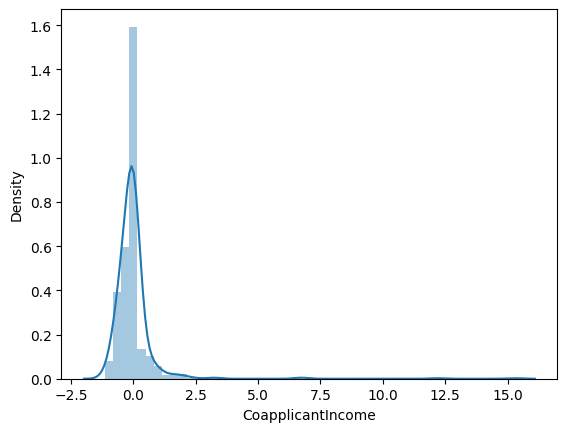

In [52]:
# Let's visualize the distribution of CoapplicantIncome after scaling.
# TIP: If you still have the unscaled dataset saved, you can plot both (before & after)
# side by side to compare how StandardScaler transformed the feature into a normal-like distribution.
sns.distplot(loan_df.CoapplicantIncome)
plt.show()

### Key Note on Scaling

* Scaling does not change the data’s distribution — only its scale.

* Before scaling, values were in their original units (e.g., income in rupees).

* After scaling, values are in terms of standard deviations (z-scores).

* The shape of the distribution remains the same — we just centered it around `0` and adjusted its spread so that standard deviation is `1`.

* This makes features with different ranges (e.g., ApplicantIncome in thousands vs. LoanAmount in hundreds) comparable during model training.

---

# Feature Scaling Normalization

We will have to do the same steps from the very begining like handeling missing data, encoding, and then Normalization.

But this time we will be using a different dataset.

In [53]:
# Set the path to the file you'd like to load
file_path = "Life Expectancy Data.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "kumarajarshi/life-expectancy-who", file_path,)

Well the dataframe is taken from [here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

In [54]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [55]:
df.shape

(2938, 22)

In [56]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [57]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [58]:
len(df.Country.unique())

193

In [59]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [61]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [62]:
df.Year

0       2015
1       2014
2       2013
3       2012
4       2011
        ... 
2933    2004
2934    2003
2935    2002
2936    2001
2937    2000
Name: Year, Length: 2938, dtype: int64

In [63]:
# First let's fill up the categorical once
cat_col = df.select_dtypes(include='object').columns

In [64]:
cat_col

Index(['Country', 'Status'], dtype='object')

In [65]:
df[cat_col].isna().sum()

Country    0
Status     0
dtype: int64

### Notes – Handling Population Column

The `Population` column had **652 missing values** out of 2938 rows (~22%).
Since population varies a lot between countries and over time, imputing missing values with methods like KNNImputer could produce highly unrealistic results (e.g., predicting very large populations for small countries or vice versa).

For this project, I decided to **drop the `Population` column** to avoid adding noise or bias into the dataset.
This simplifies the analysis and keeps the model focused on more reliable predictors like GDP, Schooling, and Adult Mortality.

In a real-world scenario, I could:

* Use forward/backward filling within each country’s time series, or

* Merge in real population data from external sources (e.g., World Bank) for higher accuracy.

In [66]:
df.drop(columns='Population',inplace=True)

In [67]:
inflo_col = df.select_dtypes(include=['float64','int64']).columns

In [68]:
df[inflo_col].isna().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [69]:
knn = KNNImputer(n_neighbors=5)
coap_df = df[inflo_col]

In [70]:
knn.fit(df[inflo_col])

,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [71]:
df[inflo_col] = pd.DataFrame(knn.transform(df[inflo_col]), columns = inflo_col,index = df.index)

In [72]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [73]:
# Since there is way too many unique values in the country column so I am gonna use label encoding
# And I am also gonna replace the old value with the encoded one's but if you wish you can add another column like Country_encoded
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [74]:
le.fit(df.Country)

LabelEncoder()

In [75]:
df['Country'] = le.transform(df.Country)

In [76]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,0,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,0,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,0,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,0,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
5,0,2010.0,Developing,58.8,279.0,74.0,0.01,79.679367,66.0,1989.0,...,102.0,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2
6,0,2009.0,Developing,58.6,281.0,77.0,0.01,56.762217,63.0,2861.0,...,106.0,63.0,9.42,63.0,0.1,445.893298,18.6,18.7,0.434,8.9
7,0,2008.0,Developing,58.1,287.0,80.0,0.03,25.873925,64.0,1599.0,...,110.0,64.0,8.33,64.0,0.1,373.361116,18.8,18.9,0.433,8.7
8,0,2007.0,Developing,57.5,295.0,82.0,0.02,10.910156,63.0,1141.0,...,113.0,63.0,6.73,63.0,0.1,369.835796,19.0,19.1,0.415,8.4
9,0,2006.0,Developing,57.3,295.0,84.0,0.03,17.171518,64.0,1990.0,...,116.0,58.0,7.43,58.0,0.1,272.563770,19.2,19.3,0.405,8.1


In [77]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [78]:
# And since the Status has only 2 values I will be using One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

In [79]:
ohe = OneHotEncoder(sparse_output=False,drop='first')
encoded = ohe.fit_transform(df[['Status']])

In [80]:
df['Status_Developing'] = pd.Series(encoded.ravel(), index=df.index)

In [81]:
df.drop(columns='Status',inplace=True)

In [82]:
df.head(10)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,1.0
1,0,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,1.0
2,0,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,1.0
3,0,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,1.0
4,0,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,1.0
5,0,2010.0,58.8,279.0,74.0,0.01,79.679367,66.0,1989.0,16.7,...,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2,1.0
6,0,2009.0,58.6,281.0,77.0,0.01,56.762217,63.0,2861.0,16.2,...,63.0,9.42,63.0,0.1,445.893298,18.6,18.7,0.434,8.9,1.0
7,0,2008.0,58.1,287.0,80.0,0.03,25.873925,64.0,1599.0,15.7,...,64.0,8.33,64.0,0.1,373.361116,18.8,18.9,0.433,8.7,1.0
8,0,2007.0,57.5,295.0,82.0,0.02,10.910156,63.0,1141.0,15.2,...,63.0,6.73,63.0,0.1,369.835796,19.0,19.1,0.415,8.4,1.0
9,0,2006.0,57.3,295.0,84.0,0.03,17.171518,64.0,1990.0,14.7,...,58.0,7.43,58.0,0.1,272.563770,19.2,19.3,0.405,8.1,1.0


Now we should be applying `Normalization` (**Min Max Scaling**) but we can't, cause I forgot to remove the **Outliers** and we are gonna do it now

In [83]:
col = df.columns

In [84]:
col

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

In [85]:
# I am gonna remove the encoded columns
lis:list = []
for cols in col:
    if cols == 'Status_Developing' or cols == 'Country' or cols == 'Year':
        continue
    else:
        lis.append(cols)

In [86]:
lis

['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [87]:
df[lis].head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


Let's remove any outliers found in any of the columns by the help of the following suggested table:

| Column                              | Type                             | Suggested Outlier Detection                            |
| ----------------------------------- | -------------------------------- | ------------------------------------------------------ |
| **Life expectancy**                 | Continuous, near-normal          | **IQR** or **Z-score**                                 |
| **Adult Mortality**                 | Skewed counts                    | **IQR**, consider log-transform first                  |
| **infant deaths**                   | Count data                       | **IQR**, but double-check (could be valid high counts) |
| **Alcohol**                         | Continuous, usually right-skewed | **IQR** or **Z-score**, maybe log-transform            |
| **percentage expenditure**          | Highly right-skewed              | **Percentile capping** (1st–99th percentile)           |
| **Hepatitis B**                     | Percentage (0–100)               | **IQR** (check missing values first)                   |
| **Measles**                         | Extreme counts possible          | **IQR**, but confirm (might be real outbreaks)         |
| **BMI**                             | Continuous, near-normal          | **Z-score** (works well for normal-ish data)           |
| **under-five deaths**               | Count data                       | **IQR**, similar to infant deaths                      |
| **Polio**                           | Percentage (0–100)               | **IQR**                                                |
| **Total expenditure**               | Continuous, mild skew possible   | **IQR**                                                |
| **Diphtheria**                      | Percentage (0–100)               | **IQR**                                                |
| **HIV/AIDS**                        | Usually small numbers but skewed | **IQR**, or percentile capping                         |
| **GDP**                             | Heavily skewed                   | **Percentile capping**                                 |
| **thinness 1-19 years**             | Percentage                       | **IQR**                                                |
| **thinness 5-9 years**              | Percentage                       | **IQR**                                                |
| **Income composition of resources** | 0–1 range                        | **IQR** (but should be smooth, few outliers)           |
| **Schooling**                       | Continuous, near-normal          | **Z-score** or **IQR**                                 |


In [88]:
# from scipy import stats

In [89]:
## Columns grouped by method
# iqr_cols = ['Life expectancy ', 'Adult Mortality', 'infant deaths',
#             'Alcohol', 'Hepatitis B', 'Measles ', 'under-five deaths ',
#             'Polio', 'Total expenditure', 'Diphtheria ',
#             ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
#             'Income composition of resources']

# zscore_cols = [' BMI ', 'Schooling']

# manual_outlier_cols = ['GDP', 'percentage expenditure']

In [90]:
## IQR-based removal
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [91]:
## Z-score based removal
# def remove_outliers_zscore(df, column, threshold=3):
#     z_scores = np.abs(stats.zscore(df[column], nan_policy='omit'))
#     return df[z_scores < threshold]

In [92]:
## Apply outlier handling
# cleaned_df = df.copy()

In [93]:
## Apply IQR removal
# for col in iqr_cols:
#     cleaned_df = remove_outliers_iqr(cleaned_df, col)

In [94]:
## Apply Z-score removal
# for col in zscore_cols:
#     cleaned_df = remove_outliers_zscore(cleaned_df, col)

In [95]:
# print(f"Original shape: {df.shape}")
# print(f"After outlier handling: {cleaned_df.shape}")

### Why I Commented Out the Previous Code

1. **"My first approach was to remove outliers from each column using both IQR and Z-score methods."**

    * **"For some columns (that I marked manually), instead of removing the outliers entirely, I replaced them with NaN and then planned to use KNNImputer to fill in those missing values."**

    * **"This felt like a better approach compared to percentile capping, because it doesn’t force extreme values to become duplicates (which can distort the distribution)."**

2. **"However, after running this process, I compared the before-and-after DataFrames and discovered that I had lost around 67% of the data — this is a huge red flag."**

    * **"Losing that much data would make my model weaker and more biased because it would be trained on a very small and non-representative sample."**

---

### What I Am Doing Now

Instead of dropping rows, I will:

* Replace detected outliers with `NaN`.

* Use **KNNImputer** with `n_neighbors=10` to fill the missing values with the most reasonable estimates based on similar rows.

---

### Concerns & Considerations

* Using KNNImputer could introduce some `synthetic patterns` into the dataset — it might smooth out variability too much or create values that are not realistic in some cases.

* But this approach keeps **all rows intact**, so my dataset remains the same size, which is better for training.

In [96]:
df_cleaned = df.copy()

In [97]:
cols = [
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling'
]


In [98]:
for col in cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace outliers with NaN instead of dropping
    df_cleaned[col] = np.where((df_cleaned[col] < lower) | (df_cleaned[col] > upper), np.nan, df_cleaned[col])

In [99]:
print("Number of NaNs after outlier replacement:")
print(df_cleaned.isna().sum())

Number of NaNs after outlier replacement:
Country                              0
Year                                 0
Life expectancy                     12
Adult Mortality                     86
infant deaths                      315
Alcohol                              1
percentage expenditure             389
Hepatitis B                        229
Measles                            542
 BMI                                 0
under-five deaths                  394
Polio                              279
Total expenditure                   37
Diphtheria                         298
 HIV/AIDS                          542
GDP                                412
 thinness  1-19 years               89
 thinness 5-9 years                 95
Income composition of resources    130
Schooling                           46
Status_Developing                    0
dtype: int64


In [100]:
imputer = KNNImputer(n_neighbors=10)
df_imputed = df_cleaned.copy()
df_imputed[cols] = imputer.fit_transform(df_cleaned[cols])

In [101]:
df_cleaned[cols] = df_imputed[cols]

In [102]:
print(f"Original shape: {df.shape}")
print(f"After outlier handling: {df_cleaned.shape}")

Original shape: (2938, 21)
After outlier handling: (2938, 21)


In [103]:
df_cleaned.isna().sum()

Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

### Summary

I handled the outliers in my dataset by replacing all detected outlier values with `np.nan`. Then, I used **KNNImputer** with `n_neighbors=10` to fill in the missing values. This approach helps preserve the overall size of the dataset and avoids losing a large portion of data, which would have happened if I had simply dropped rows containing outliers.

Alternatively, you can use **RobustScaler**, which scales the data using the median and IQR. This keeps the data intact — meaning valuable data points, including outliers, remain unchanged — but it might still cause issues for the model since the outliers are technically still present (just scaled down).

Using KNNImputer provides a good balance between keeping the dataset complete and reducing the extreme influence of outliers, since it fills missing values based on similar neighboring data points rather than forcing them to a capped or arbitrary value. This helps create a more realistic and balanced dataset for modeling.

---


Anyway, now we can apply `Normalization` on the above columns.

If you are wondering whether it is okay to normalize these columns, here are a few important points to keep in mind:

### Things to Watch Out For

* **Count Columns**: Columns like `infant deaths` or `under-five deaths` are counts rather than continuous variables. Normalization is still okay, but interpret carefully — scaling only changes the units, not the relationships.

* **Outliers**: If some columns have extreme values (like `GDP` or `percentage expenditure`), MinMaxScaler might compress most of the data into a very small range. In that case, use RobustScaler or **StandardScaler** for better results.

### Recommended Scaling Methods

| Column Type / Distribution                                    | Recommended Scaling Method                                           |
| ------------------------------------------------------------- | -------------------------------------------------------------------- |
| Mostly normal / symmetric                                     | **StandardScaler** (z-score)                                         |
| Highly skewed (e.g. GDP, expenditure)                         | **RobustScaler** (less sensitive to outliers) or log-transform first |
| Bounded between 0–100 (like Hepatitis B, Polio, Diphtheria %) | **MinMaxScaler** (keeps them in \[0,1] range)                        |


In [104]:
df_cleaned_2 = df_cleaned.copy()

### Normalization (Min Max Scaling)

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between `0` and `1`.

$$x_{new} = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}$$

In [105]:
lis

['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

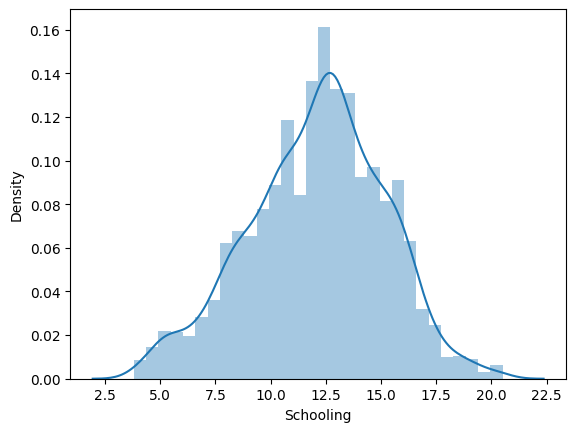

In [106]:
# Let's first take a random column to check for outliers
sns.distplot(df_cleaned_2.Schooling)
plt.show()

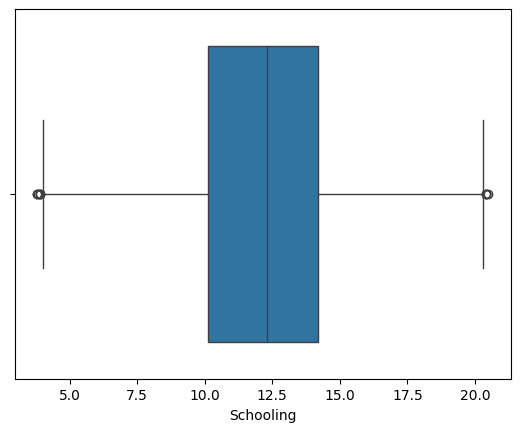

In [107]:
sns.boxplot(data = df_cleaned_2, x='Schooling')
plt.show()

The distribution plot shows a fairly normal distribution with only a few outliers present. I decided to keep them because they are very close to the dataset’s minimum and maximum values, and removing them would unnecessarily distort the data.

In [108]:
# Let's import the library required for the min max scaler
from sklearn.preprocessing import MinMaxScaler

In [109]:
ms = MinMaxScaler()
ms.fit(df_cleaned_2[['Schooling']])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [110]:
df_cleaned_2['Schooling_minmax'] = ms.transform(df_cleaned_2[['Schooling']])

In [111]:
df_cleaned_2.head(10)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Schooling_minmax
0,0,2015.0,65.0,263.0,19.0,0.01,71.279624,65.0,210.3,19.1,...,8.16,65.0,0.1,584.259210,6.362,6.248,0.479,10.1,1.0,0.377246
1,0,2014.0,59.9,271.0,23.7,0.01,73.523582,62.0,492.0,18.6,...,8.18,62.0,0.1,612.696514,6.002,5.808,0.476,10.0,1.0,0.371257
2,0,2013.0,59.9,268.0,22.8,0.01,73.219243,64.0,430.0,18.1,...,8.13,64.0,0.1,631.744976,6.722,6.546,0.470,9.9,1.0,0.365269
3,0,2012.0,59.5,272.0,27.9,0.01,78.184215,67.0,214.2,17.6,...,8.52,67.0,0.1,669.959000,8.070,7.888,0.463,9.8,1.0,0.359281
4,0,2011.0,59.2,275.0,23.8,0.01,7.097109,68.0,178.2,17.2,...,7.87,68.0,0.1,63.537231,7.770,7.640,0.454,9.5,1.0,0.341317
5,0,2010.0,58.8,279.0,20.8,0.01,79.679367,66.0,202.0,16.7,...,9.20,66.0,0.1,553.328940,8.242,8.058,0.448,9.2,1.0,0.323353
6,0,2009.0,58.6,281.0,19.0,0.01,56.762217,63.0,75.3,16.2,...,9.42,63.0,0.1,445.893298,8.074,7.644,0.434,8.9,1.0,0.305389
7,0,2008.0,58.1,287.0,25.1,0.03,25.873925,64.0,315.7,15.7,...,8.33,64.0,0.1,373.361116,8.696,7.528,0.433,8.7,1.0,0.293413
8,0,2007.0,57.5,295.0,26.8,0.02,10.910156,63.0,157.0,15.2,...,6.73,63.0,0.1,369.835796,8.276,7.058,0.415,8.4,1.0,0.275449
9,0,2006.0,57.3,295.0,34.8,0.03,17.171518,64.0,127.0,14.7,...,7.43,58.0,0.1,272.563770,8.380,7.460,0.405,8.1,1.0,0.257485


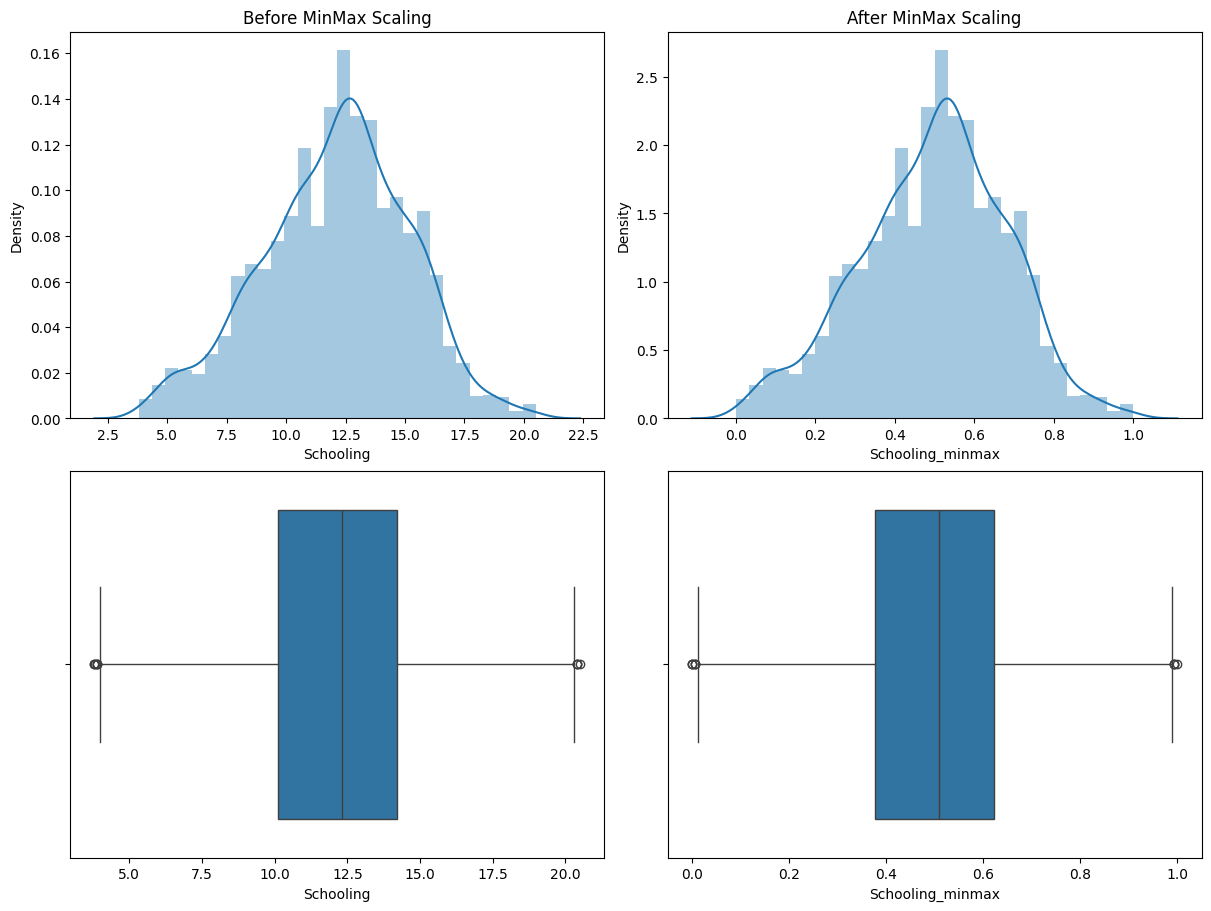

In [112]:
# Let's compare if the MinMax Scaler has changed anything from the DataFrame or not
fig, axes = plt.subplots(2, 2, figsize=(12,9), constrained_layout=True)

axes[0,0].set_title('Before MinMax Scaling')
sns.distplot(df_cleaned_2.Schooling, ax=axes[0,0]);

axes[0,1].set_title('After MinMax Scaling')
sns.distplot(df_cleaned_2.Schooling_minmax, ax=axes[0,1]);

sns.boxplot(data=df_cleaned_2, x='Schooling', ax=axes[1,0]);

sns.boxplot(data=df_cleaned_2, x='Schooling_minmax', ax=axes[1,1]);